Yay! Exercises! 

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression
import numpy as np
import hashlib # for grading purposes
%matplotlib inline 
import utils

### You're hired

You've been hired as the data scientist for a supermarket chain that wants to start exctracting insights from their data. First you'll start with a specific store.

Let's get our data:

In [2]:
store = utils.get_store_data()
store.head()

,date,customers
67528,2016-10-18,1655
55251,2016-02-27,1314
49000,2015-10-28,1784
54244,2016-02-08,417
48311,2015-10-15,1725


#### Q1: make the index the datetime of the dates. 

In [3]:
# We expect the solution to be a dataframe
store['date'] = pd.to_datetime(store['date'], infer_datetime_format=True)
store = store.set_index('date')
store = store.sort_index()

In [4]:
expected_hash = '24e6fe346ad970255e2da6db24d4721d0a240cbb5a00a58fe731b4ad767d6ab0'
assert hashlib.sha256(str(store.iloc[25].name).encode()).hexdigest() == expected_hash
assert hashlib.sha256(str(store.index.dtype).encode()).hexdigest() == '261738f2e43a1c47a16f043b46deb993943d61f4a2bbe5ef4b03c3fb1af362b5'


# clue: if this assert is failing, and your iloc[25].name is '18/02/2015', 
# then you are missing the "best practices" part. 
# What did we say in the Learning notebook about this? 

#### Q2: what was the worse day in terms of customers on December 2016?

In [5]:
# hint: the answer should be a timestamp
dec_2016=store.loc['Dec 2016']
minimum=dec_2016['customers'].min()
dec_2016=dec_2016.reset_index().set_index('customers')
dec_2016
worst_day = dec_2016.loc[488,'date']

In [6]:
expected_hash = 'a857d04e7b105cd2c922665d08abcba6474f8adbc46d68f34ad851ed99ae6b40'
assert hashlib.sha256(str(worst_day).encode()).hexdigest() == expected_hash

#### Q3: last wednesday there were 2800 customers, your boss said he's never seen so much people on a wednesday. To confirm if it is true, can you find the maximum number of customers that we've ever had on a wednesday?

- _hint #1: you can use the methods at the bottom of this [page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) directly on the index_  
- _hint #2: when operating directly on the index, you do not need to use `.dt` to use the methods_

In [7]:
new_store= store.reset_index()
new_store['weekdays']= new_store['date'].dt.weekday_name
new_store= new_store.set_index('weekdays', drop=True).sort_index()
wednesdays= new_store.loc['Wednesday']
wednesdays['customers'].max()
max_customers_wednesday = 2833

In [8]:
expected_hash = '99dbbc4aad5da980a3b5035ff28d2e9f828d973cf7be91cdf3b6886741879371'
assert hashlib.sha256(str(max_customers_wednesday).encode()).hexdigest() == expected_hash

#### Q4: "today there were news about an approaching zombie apocalypse, everyone came to buy stuff. I've never seen such an absolute increase in sales from one day to the next. Yesterday there were 100 customers, today there were 5000." To confirm if what your boss is saying is true, can you find the maximum increase in sales from one day to the next?

In [9]:
# hint: the solution expects a float
max_increase= store['customers'].diff().max()

In [10]:
expected_hash = '879f277341e3578a03df02d7f9a1e98da6b7678e09b8490db4fa87a64b77c414'
assert hashlib.sha256(str(max_increase).encode()).hexdigest() == expected_hash

#### Q5: It turned out the zombie apocalypse was fake news, but it still was a week with a signficant total amount of customers: 1300. What was the last week we had more transactions than this?

In [11]:
# We expect the answer to be a weekly time period (freq='W-SUN'), so answers  
# which are of the form "the first monday of that week" will not pass the grader. 
# hint: by default pandas uses freq='W-SUN'

total_weekly_customers = store.resample('W-Sun').sum().reset_index(drop=False)
store2= total_weekly_customers.set_index('customers').sort_index(ascending=False)
last_week_customers = store2.iloc[2]

In [12]:
expected_hash = '392462e1c962b89eb0b84a245f954a54f7d3c7ac930508ef8df909ee02586613'
assert hashlib.sha256(str(last_week_customers).encode()).hexdigest() == expected_hash

AssertionError: 

### Congrats!

Your work is proving useful, so your boss has asked to expand your analysis to the whole chain. 

Let's get the new data:

In [13]:
stores = utils.get_stores_data()
stores.head()

,date,store_nbr,customers
43273,2015-07-09,7,1830
18371,2014-02-02,6,2210
32615,2014-12-01,10,1107
62678,2016-07-16,10,1002
58823,2016-05-04,24,2306


In [14]:
data = utils.get_stores_data()
print('We now have %0.0f data points. Wooooow!' % len(data))

We now have 83488 data points. Wooooow!


The thing is, we can't just set the index to be the day, as we now have multiple stores on the same day. 

Looks like we have to go into multi-indexing...

#### Q6: make the date into a datetime, and then set the index to be `[Date, Store]`

In [15]:
stores['date'] = pd.to_datetime(stores['date'], infer_datetime_format=True)
stores = stores.set_index(['date', 'store_nbr']).sort_index()

In [16]:
assert hashlib.sha256(str(stores.index.get_level_values(0)).encode()).hexdigest() ==  \
        'aff1142eb44c03cc16656f3c3541ade7b5c151abcb4340fb14a058a7fec7e46b'
assert hashlib.sha256(str(stores.index.get_level_values(1)).encode()).hexdigest() ==  \
        'd28cc6e9308dd2e399e100566cc5366b0ef79b74d84a5d666d792c4514704bfb'
assert hashlib.sha256(str(stores.index.get_level_values(0).dtype).encode()).hexdigest() == \
        '261738f2e43a1c47a16f043b46deb993943d61f4a2bbe5ef4b03c3fb1af362b5'

#### Q7: when did store 20 open?

In [17]:
# hint: the answer should be a timestamp
idx = pd.IndexSlice
stores.loc[idx[: , 20],:].index.min()
store_20_open='2015-02-13 00:00:00'

In [18]:
expected_hash = '789fe6da1fa44792a15fa1285ef9a11021bf3f7771255545462153f69338b3c9'
assert hashlib.sha256(str(store_20_open).encode()).hexdigest() == expected_hash

#### Q8: how many stores opened in 2015?

In [19]:
# hint: you can assume that no stores closed in 2015.

nr_stores_2014 = 48
nr_stores_2015 = 53
nr_stores_opened_2015 = 5
stores2=stores.copy()
stores2.reset_index(level='store_nbr', drop=False, inplace=True)
stores.loc['2015'].sum(level='store_nbr').shape

(53, 1)

In [20]:
expected_hash = 'ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfbec78f5564afe39d'
assert hashlib.sha256(str(nr_stores_opened_2015).encode()).hexdigest() == expected_hash

#### Q9: Does the total number of customers that go to stores have a stronger weekly or bi-weekly seasonality during 2016?

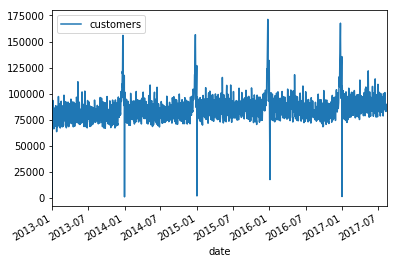

In [30]:
# We expect you to use correlation as a proxy for seasonality.

# hint 1: Get the total sales per day (sum over all stores), and see whether seasonality 
# is bigger for 7 or for 14 days.

# hint2: the order suggested below has a reason. You can think about what would 
# happen if you did it in the opposite order.

# hint3: we expect you to use correlation as a proxy for seasonality. 
# the grader expects you to use the pandas method for correlation

# hint4: use a negative shift

total_sales_per_day = stores.groupby(level='date').sum()
total_sales_per_day.plot()

total_sales_per_day_week_before = total_sales_per_day.resample('W-Sun').sum().reset_index(drop=False)
total_sales_per_day_2_weeks_before = total_sales_per_day.resample('2W-Sun').sum().reset_index(drop=False)

total_sales_per_day_2016_week_before = total_sales_per_day.loc['2016'].resample('W-Sun').sum().reset_index(drop=False)
total_sales_per_day_2016_2_weeks_before = total_sales_per_day.loc['2016'].resample('2W-Sun').sum().reset_index(drop=False)

total_sales_per_day_2016_week_before['lag_1'] = total_sales_per_day_2016_week_before['customers'].shift(-1)
total_sales_per_day_2016_2_weeks_before['lag_1'] = total_sales_per_day_2016_2_weeks_before['customers'].shift(-1)

weekly_corr = total_sales_per_day_2016_week_before.corr()['lag_1'].customers
biweekly_corr = total_sales_per_day_2016_2_weeks_before.corr()['lag_1'].customers


# YOUR CODE HERE

In [31]:
expected_hash1 = '96cc11d2ee80bddd4e7241aa7b6abac54810adc28140198c1525a4f1ba9a78db'
expected_hash2 = '2c66c7d6bee05863b57168ff4f235a7811905085e937d492bf379d379cd3ed95'
assert hashlib.sha256(str(weekly_corr).encode()).hexdigest() == expected_hash1
assert hashlib.sha256(str(biweekly_corr).encode()).hexdigest() == expected_hash2

AssertionError: 

#### **Q10: What is the store with the strongest positive trend? Only including stores that were open since 2013**

In [ ]:
# This one is a bit harder and there are several ways to solve it. For this reasons the
# body of the solution is not presented as in the previous questions. 

# A few clues:
# don't forget to select only the stores that were open since 2013. 
# most solutions are going to require a for loop to run through the various stores
# assume linear trends, where the trend is characterized by the slope of the linear regression

# max_trend_store = 

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
expected_hash = '0e17daca5f3e175f448bacace3bc0da47d0655a74c8dd0dc497a3afbdad95f1f'
assert hashlib.sha256(str(max_trend_store).encode()).hexdigest() == expected_hash